In [1]:
import pandas as pd 
import numpy as np
import re

# Visualisation libraries
import seaborn as sns

import missingno as msno #For missing value visualization
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

# From here: https://www.tutorialspoint.com/plotly/plotly_plotting_inline_with_jupyter_notebook.htm
import plotly.offline as py
py.init_notebook_mode(connected=True)

# string utility
import string

# main nlp library and modell
import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

import time

# Calculation of Performance of Models
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score


# Modelling Purpose
# Regression model
from sklearn.linear_model import LogisticRegression

# Ensemble model
from sklearn.tree import DecisionTreeClassifier

# Essentially, Random Forest is a group of decision trees
from sklearn.ensemble import RandomForestClassifier

# 

# Support Vector Classifier, based on SVMs (Support Vector Machines)
from sklearn.svm import SVC

# https://nlp.stanford.edu/IR-book/html/htmledition/naive-bayes-text-classification-1.html
from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import ExtraTreeClassifier
from sklearn.multiclass import OneVsRestClassifier

# Random classification, ignoring inputs
from sklearn.dummy import DummyClassifier

## K-nearest neighbor classifieer
from sklearn.neighbors import KNeighborsClassifier

## SGDClassifier
from sklearn.linear_model import SGDClassifier

In [3]:
## data Exploration
florina_data = pd.read_csv(r"data\florina.csv", sep=";", encoding='utf-8')
ibrahim_data = pd.read_csv("data\ibrahim.csv", sep=";", encoding="utf-8")
mohamed_data = pd.read_csv("data\mohamed.csv", sep=";", encoding="utf-8")

dataset = pd.concat([florina_data, ibrahim_data, mohamed_data])

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8530 entries, 0 to 2804
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Column1       5725 non-null   float64
 1   Unnamed: 0    8530 non-null   int64  
 2   date          8530 non-null   object 
 3   news          8530 non-null   object 
 4   label         7197 non-null   float64
 5   Unnamed: 0.1  2805 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 466.5+ KB


In [5]:
dataset.head()

,Column1,Unnamed: 0,date,news,label,Unnamed: 0.1
0,5739.0,5739,7112022,But the demand for Tesla miles significantly ...,0.0,NaN
1,5740.0,5740,7112022,yeah... of course... absolutely embarassing m...,0.0,NaN
2,5741.0,5741,7112022,Remind me of the FUD Tesla is going through,0.0,NaN
3,5742.0,5742,7112022,when will SpaceX or Tesla create an electrost...,1.0,NaN
4,5743.0,5743,7112022,I wanna Tesla i hope one day have one ????,1.0,NaN


In [6]:
## data cleaning
dataset = dataset[["news", "label"]]
dataset.head()

,news,label
0,But the demand for Tesla miles significantly ...,0.0
1,yeah... of course... absolutely embarassing m...,0.0
2,Remind me of the FUD Tesla is going through,0.0
3,when will SpaceX or Tesla create an electrost...,1.0
4,I wanna Tesla i hope one day have one ????,1.0


<AxesSubplot:>

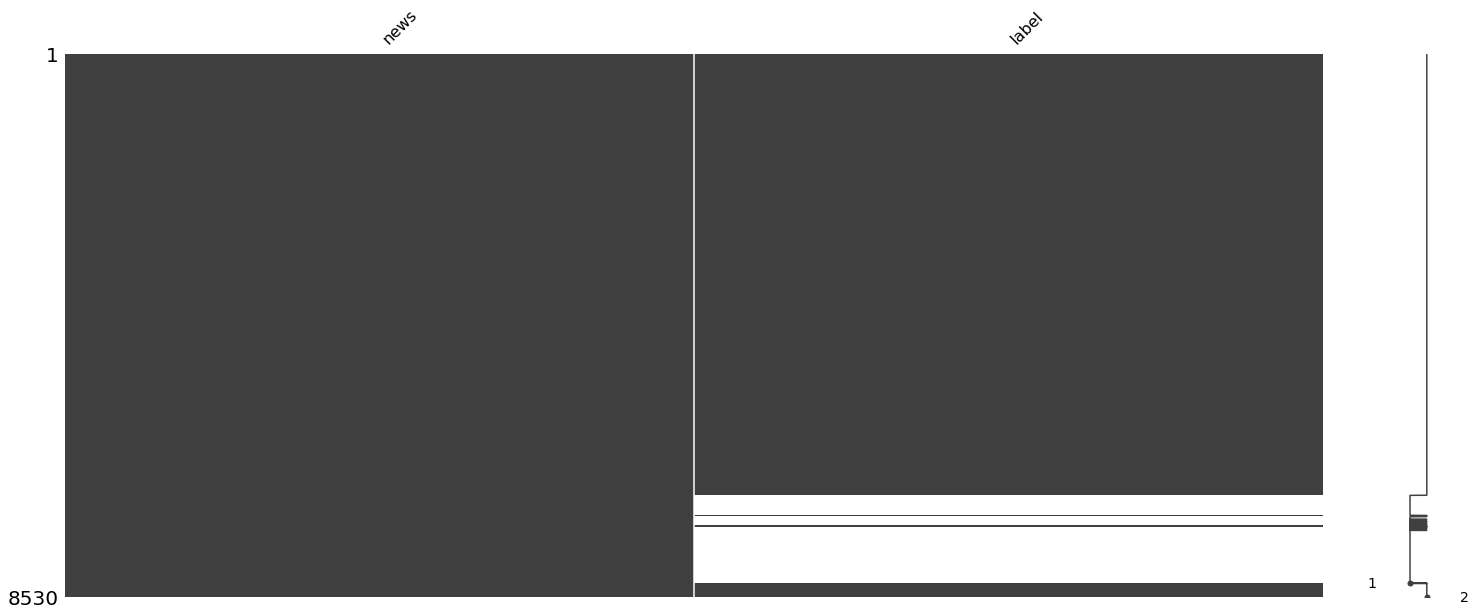

In [7]:
## null value 
msno.matrix(dataset)

In [8]:
## drop rows with null label
dataset = dataset[dataset['label'].notna()]

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 2804
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   news    7197 non-null   object 
 1   label   7197 non-null   float64
dtypes: float64(1), object(1)
memory usage: 168.7+ KB


In [10]:
#cleaning unecessary text from the string 
def clean(text):
    # cleanup 
    #text = re.sub('<.*?>+',' ',text) #removing HTML Tags
    #text = re.sub('\n', ' ',text) #removal of new line characters
    #text = re.sub(r'\s+', ' ',text) #removal of multiple spaces
    
    # tokenize and analyze text
    doc = nlp(text)
    
    # concatenate tokens that are not stopwords and only alphabethic letters
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    cleaned_text = " ".join(tokens) if len(tokens)>0 else None

    return cleaned_text

In [11]:
dataset['news'] = dataset['news'].apply(clean)

In [12]:
dataset.head()

,news,label
0,demand Tesla mile significantly increase ton p...,0.0
1,yeah course absolutely embarasse man like see ...,0.0
2,remind FUD Tesla go,0.0
3,SpaceX Tesla create electrostatic fusion confi...,1.0
4,wanna Tesla hope day,1.0


<AxesSubplot:>

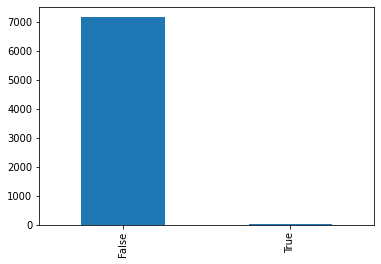

In [13]:
dataset["news"].isna().value_counts().plot(kind="bar")

In [14]:
dataset.dropna(inplace=True)

<AxesSubplot:>

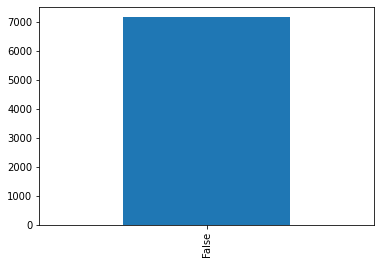

In [15]:
dataset["news"].isna().value_counts().plot(kind="bar")

In [16]:
# store cleaned data
dataset.to_csv("data\cleaned_data.csv", index=False)

In [17]:
# load cleaned data
data = pd.read_csv("data\cleaned_data.csv")
print(f"Rows with empy columns: {data.isna().sum()}")

Rows with empy columns: news     0
label    0
dtype: int64


In [18]:
data['label'].value_counts()

 0.0    4028
 1.0    1611
-1.0    1526
Name: label, dtype: int64

In [19]:
genre_df = pd.DataFrame({'label':['neutral', 'positiv', 'negativ'],'count':[4009, 1570, 1506]})
fig = px.histogram(genre_df,x = 'label',y = 'count',color = 'label')
fig.show()

In [20]:
def print_word_cloud(label,news):
    print(label)
    wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                min_font_size = 10).generate(news)
    plt.figure(figsize = (7, 7), facecolor = 'white', edgecolor='blue') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

def make_string(label):
    news_str = ""
    for row_index,row in data[data['label']==label].iterrows():
        news_str += " " + row['news']
    return news_str

0.0


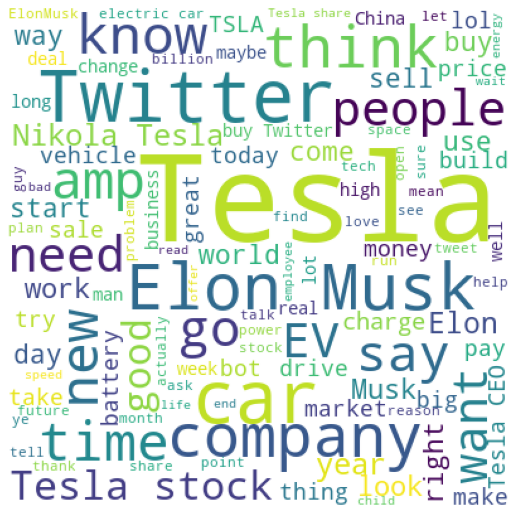

1.0


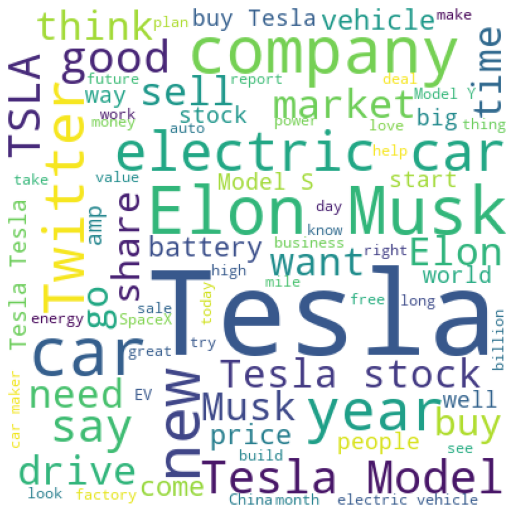

-1.0


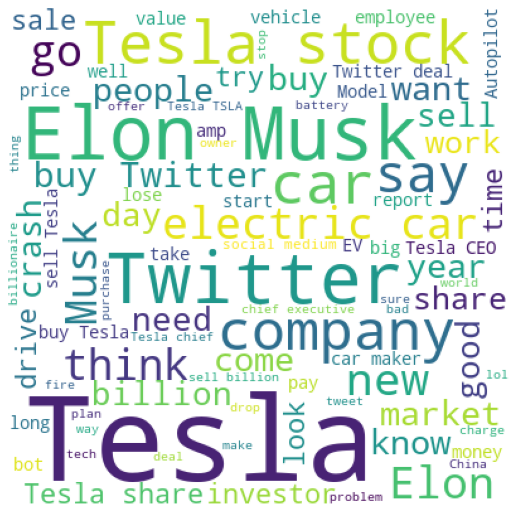

In [21]:
labels = data["label"].unique().tolist()
for l in labels:
    news_string = make_string(l)
    print_word_cloud(l, news_string)

In [22]:
## modelling

#Converting all the categorical features of 'label' to numerical
data['label'] = LabelEncoder().fit_transform(data['label'])
data.head()

,news,label
0,demand Tesla mile significantly increase ton p...,1
1,yeah course absolutely embarasse man like see ...,1
2,remind FUD Tesla go,1
3,SpaceX Tesla create electrostatic fusion confi...,2
4,wanna Tesla hope day,2


In [23]:
X = CountVectorizer().fit_transform(data['news'])
y = data['label']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
models = [MultinomialNB(),LogisticRegression(),RandomForestClassifier(),SVC(),DummyClassifier(),DecisionTreeClassifier(), KNeighborsClassifier(), SGDClassifier()]

In [26]:
## without using onevsrest
Name = []
Accuracy = []
Precision = []
F1_Score = []
Recall = []
Time_Taken = []
for model in models:
    name = type(model).__name__
    Name.append(name)
    begin = time.time()
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    end = time.time()
    Accuracy.append(accuracy_score(prediction,y_test))
    Precision.append(precision_score(prediction,y_test,average = 'macro'))
    Recall.append(recall_score(prediction,y_test,average = 'macro'))
    F1_Score.append(f1_score(prediction,y_test,average = 'macro'))
    Time_Taken.append(end-begin)
    print(name + ' Successfully Trained')

MultinomialNB Successfully Trained


C:\Users\moham\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression Successfully Trained
RandomForestClassifier Successfully Trained
SVC Successfully Trained
DummyClassifier Successfully Trained


C:\Users\moham\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



DecisionTreeClassifier Successfully Trained
KNeighborsClassifier Successfully Trained
SGDClassifier Successfully Trained


In [27]:
Dict = {'Name':Name,'Accuracy':Accuracy,'Precision_score':Precision,'Recall_score':Precision,
        'F1_score':F1_Score,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict)
model_df

,Name,Accuracy,Precision_score,Recall_score,F1_score,Time Taken
0,MultinomialNB,0.554082,0.458608,0.458608,0.466036,0.001952
1,LogisticRegression,0.576413,0.481258,0.481258,0.489470,0.398691
2,RandomForestClassifier,0.583391,0.477140,0.477140,0.484267,9.027870
3,SVC,0.605024,0.432214,0.432214,0.427318,4.094178
4,DummyClassifier,0.559665,0.333333,0.333333,0.239224,0.000701
5,DecisionTreeClassifier,0.511514,0.457872,0.457872,0.454967,0.504981
6,KNeighborsClassifier,0.524773,0.439592,0.439592,0.443253,0.175494
7,SGDClassifier,0.558967,0.485459,0.485459,0.489885,0.039723


In [28]:
model_df.sort_values(by = 'Accuracy',ascending = False,inplace = True)
fig = px.line(model_df, x="Name", y="Accuracy", title='Accuracy VS Model')
fig.show()

In [29]:
model_df.sort_values(by = 'Time Taken',ascending = False,inplace = True)
fig = px.line(model_df, x="Name", y="Time Taken", title='Time Taken VS Model')
fig.show()